In [11]:
import numpy as np
import pandas as pd

In [12]:
df = pd.read_csv("wine.csv",sep=";")
df


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.5,0.33,0.32,11.1,0.036,25.0,119.0,0.99620,3.15,0.34,10.5,6
1,6.3,0.27,0.29,12.2,0.044,59.0,196.0,0.99782,3.14,0.40,8.8,6
2,7.0,0.30,0.51,13.6,0.050,40.0,168.0,0.99760,3.07,0.52,9.6,7
3,7.4,0.38,0.27,7.5,0.041,24.0,160.0,0.99535,3.17,0.43,10,5
4,8.1,0.12,0.38,0.9,0.034,36.0,86.0,0.99026,2.80,0.55,12,6
...,...,...,...,...,...,...,...,...,...,...,...,...
2032,8.1,0.34,0.28,7.5,0.040,70.0,230.0,0.99558,3.14,0.55,9.8,6
2033,7.4,0.19,0.31,14.5,0.045,39.0,193.0,0.99860,3.10,0.50,9.2,6
2034,6.7,0.36,0.26,7.9,0.034,39.0,123.0,0.99119,2.99,0.30,12.2,7
2035,7.7,0.28,0.35,15.3,0.056,31.0,117.0,0.99980,3.27,0.50,9.6,5


In [13]:
df['alcohol'] = pd.to_numeric(df['alcohol'],errors='coerce')
df['alcohol'].fillna(df['alcohol'].mean(), inplace = True)

In [14]:
lower_limit = df["free_sulfur_dioxide"].mean() - 3*df["free_sulfur_dioxide"].std()
upper_limit = df["free_sulfur_dioxide"].mean() + 3*df["free_sulfur_dioxide"].std()

In [15]:
df2 = df[(df["free_sulfur_dioxide"] > lower_limit) & (df["free_sulfur_dioxide"] < upper_limit)]

In [16]:
lower_limit = df2['total_sulfur_dioxide'].mean() - 3*df2['total_sulfur_dioxide'].std()
upper_limit = df2['total_sulfur_dioxide'].mean() + 3*df2['total_sulfur_dioxide'].std()

In [17]:
df3 = df2[(df2['total_sulfur_dioxide'] > lower_limit) & (df2['total_sulfur_dioxide'] < upper_limit)]

In [18]:
lower_limit = df3['residual_sugar'].mean() - 3*df3['residual_sugar'].std()
upper_limit = df3['residual_sugar'].mean() + 3*df3['residual_sugar'].std()

In [19]:
df4 = df3[(df3['residual_sugar'] > lower_limit) & (df3['residual_sugar'] < upper_limit)]

In [20]:
lower_limit = df4["chlorides"].mean() - 3*df4["chlorides"].std()
upper_limit = df4["chlorides"].mean() + 3*df4["chlorides"].std()

In [21]:
df5 = df4[(df4['chlorides'] > lower_limit) & (df4['chlorides'] < upper_limit)]
lower_limit = df5["sulphates"].mean() - 3*df5["sulphates"].std()
upper_limit = df5["sulphates"].mean() + 3*df5["sulphates"].std()

In [22]:
df6 = df5[(df5['sulphates'] > lower_limit) & (df5['sulphates'] < upper_limit)]
lower_limit = df6["volatile_acidity"].mean() - 3*df6["volatile_acidity"].std()
upper_limit = df6["volatile_acidity"].mean() + 3*df6["volatile_acidity"].std()

In [23]:
df7 = df6[(df6['volatile_acidity'] > lower_limit) & (df6['volatile_acidity'] < upper_limit)]
lower_limit = df7["fixed_acidity"].mean() - 3*df7["fixed_acidity"].std()
upper_limit = df7["fixed_acidity"].mean() + 3*df7["fixed_acidity"].std()

In [24]:
df8 = df7[(df7['fixed_acidity'] > lower_limit) & (df7['fixed_acidity'] < upper_limit)]
lower_limit = df8["citric_acid"].mean() - 3*df8["citric_acid"].std()
upper_limit = df8["citric_acid"].mean() + 3*df8["citric_acid"].std()

In [25]:
df9 = df8[(df8['citric_acid'] > lower_limit) & (df8['citric_acid'] < upper_limit)]
lower_limit = df9["pH"].mean() - 3*df9["pH"].std()
upper_limit = df9["pH"].mean() + 3*df9["pH"].std()

In [26]:
df10 = df9[(df9['pH'] > lower_limit) & (df9['pH'] < upper_limit)]

In [27]:
quality_mapping = { 3 : "Low", 4 : "Low", 5: "Medium",6 : "Medium",7: "Medium",8 : "High",9 : "High"}
df10["quality"] =  df10["quality"].map(quality_mapping)

In [28]:
quality_code = {"Low" : 0,"Medium": 1,"High" : 2}
df10["quality"] =  df10["quality"].map(quality_code)

In [29]:
train=df10

In [30]:
from sklearn.model_selection import train_test_split
X=train.drop(['quality'],axis=1)
y=train['quality']

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
print(X.shape)

(2025, 11)


In [32]:
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(X)

In [33]:
pca_new = PCA(n_components=10)
x_new = pca_new.fit_transform(X)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(x_new, y, test_size = 0.2,random_state=1)

**Models**

Adaboost ( based on combining multiple “weak classifiers” into a single “strong classifier”)

In [35]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
clf_ada = AdaBoostClassifier(n_estimators=100, random_state=0)
clf_ada.fit(X_train,y_train)
pred_ada=clf_ada.predict(X_test)
x_ada=accuracy_score(y_test,pred_ada)
print(f'the accuracy score is {x_ada}')

the accuracy score is 0.7802469135802469


In [36]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,pred_ada)
print(cm)

[[  2  11   1]
 [ 15 314  50]
 [  0  12   0]]


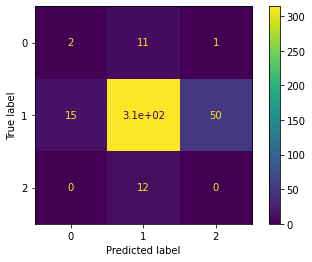

In [37]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf_ada, X_test, y_test)  
plt.show()


XGBoost (decision-tree-based ensemble ML algorithm based on gradient boosting framework )

In [38]:
!pip3 install xgboost

In [39]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
model=xgb.XGBClassifier(n_estimators=400, random_state=42)
model.fit(X_train,y_train)
pred_xg=model.predict(X_test)
x=accuracy_score(y_test,pred_xg)
print(f'the accuracy score is {x}')

the accuracy score is 0.9333333333333333


In [40]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,pred_xg)
print(cm)

[[  0  14   0]
 [  0 376   3]
 [  0  10   2]]


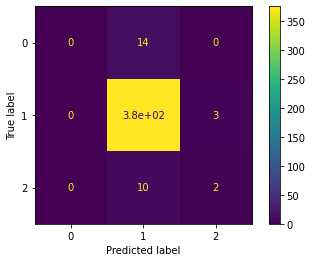

In [41]:
plot_confusion_matrix(model, X_test, y_test)  
plt.show()


Catboost (based on gradient boosted decision trees)

In [42]:
!pip3 install catboost

     |████████████████████████████████| 76.4 MB 24 kB/s 


In [43]:
from catboost import CatBoostClassifier
clf = CatBoostClassifier(iterations=100,  learning_rate=0.1)
clf.fit(X_train,y_train)

0:	learn: 0.9524646	total: 55.8ms	remaining: 5.52s
1:	learn: 0.8433881	total: 62.7ms	remaining: 3.07s
2:	learn: 0.7522715	total: 69.3ms	remaining: 2.24s
3:	learn: 0.6819531	total: 75.9ms	remaining: 1.82s
4:	learn: 0.6178462	total: 82.7ms	remaining: 1.57s
5:	learn: 0.5687483	total: 89.5ms	remaining: 1.4s
6:	learn: 0.5280112	total: 96.4ms	remaining: 1.28s
7:	learn: 0.4900132	total: 103ms	remaining: 1.19s
8:	learn: 0.4558805	total: 111ms	remaining: 1.12s
9:	learn: 0.4257214	total: 118ms	remaining: 1.06s
10:	learn: 0.4018671	total: 125ms	remaining: 1.01s
11:	learn: 0.3785114	total: 131ms	remaining: 964ms
12:	learn: 0.3601597	total: 138ms	remaining: 925ms
13:	learn: 0.3428438	total: 145ms	remaining: 890ms
14:	learn: 0.3260459	total: 156ms	remaining: 881ms
15:	learn: 0.3127812	total: 163ms	remaining: 854ms
16:	learn: 0.3005252	total: 169ms	remaining: 827ms
17:	learn: 0.2890829	total: 176ms	remaining: 801ms
18:	learn: 0.2797622	total: 183ms	remaining: 778ms
19:	learn: 0.2698386	total: 189ms	r

In [44]:
pred_cat=clf.predict(X_test)

In [45]:
x_cat=accuracy_score(y_test,pred_cat)
print(f'the accuracy score is {x_cat}')

the accuracy score is 0.9358024691358025


In [46]:
cm= confusion_matrix(y_test,pred_cat)
print(cm)

[[  0  14   0]
 [  0 379   0]
 [  0  12   0]]


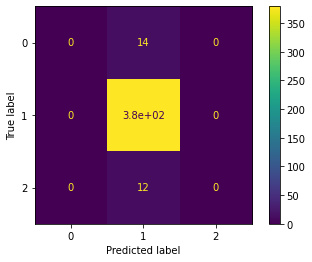

In [47]:
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()


Light GBM (fast, distrubted gradient boosting method)

In [48]:
from lightgbm import LGBMClassifier
model_ = LGBMClassifier(n_estimators=100,num_leaves=35,learning_rate=0.1,max_bin=255,max_depth=-1)
model_.fit(X_train,y_train)
pred_lgm=model_.predict(X_test)
x_lgm=accuracy_score(y_test,pred_lgm)
print(f'the accuracy score is {x_lgm}')

the accuracy score is 0.9407407407407408


In [49]:
cm= confusion_matrix(y_test,pred_lgm)
print(cm)

[[  0  14   0]
 [  0 379   0]
 [  0  10   2]]


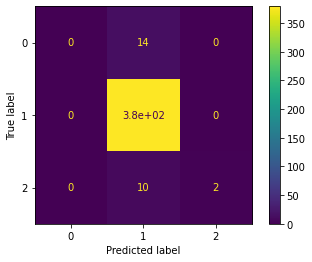

In [50]:
plot_confusion_matrix(model_, X_test, y_test)  
plt.show()


Bagged Light GBM

In [51]:
from sklearn.ensemble import BaggingClassifier
clf_2 = BaggingClassifier(base_estimator= LGBMClassifier(), n_estimators=200).fit(X_train,y_train)
pred_bag_=clf_2.predict(X_test)
x_bag_=accuracy_score(y_test,pred_bag_)
print(f'the accuracy score is {x_bag_}')

the accuracy score is 0.9407407407407408


In [52]:
cm= confusion_matrix(y_test,pred_bag_)
print(cm)

[[  0  14   0]
 [  0 379   0]
 [  0  10   2]]


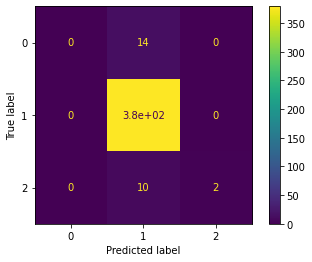

In [53]:
plot_confusion_matrix(clf_2, X_test, y_test)  
plt.show()


Bagged Catboost

In [54]:
clf_3 = BaggingClassifier(base_estimator= CatBoostClassifier(), n_estimators=40).fit(X_train,y_train)
pred_bag_c=clf_3.predict(X_test)
x_bag_c=accuracy_score(y_test,pred_bag_c)
print(f'the accuracy score is {x_bag_c}')

Streaming output truncated to the last 5000 lines.
5:	learn: 0.6266431	total: 43.7ms	remaining: 7.25s
6:	learn: 0.5853225	total: 51.6ms	remaining: 7.32s
7:	learn: 0.5461011	total: 59.4ms	remaining: 7.37s
8:	learn: 0.5103773	total: 66.5ms	remaining: 7.32s
9:	learn: 0.4782236	total: 73.2ms	remaining: 7.25s
10:	learn: 0.4502665	total: 80.4ms	remaining: 7.23s
11:	learn: 0.4245655	total: 87.5ms	remaining: 7.2s
12:	learn: 0.4032572	total: 94.6ms	remaining: 7.18s
13:	learn: 0.3835007	total: 101ms	remaining: 7.15s
14:	learn: 0.3642651	total: 109ms	remaining: 7.19s
15:	learn: 0.3478116	total: 119ms	remaining: 7.3s
16:	learn: 0.3326277	total: 126ms	remaining: 7.27s
17:	learn: 0.3180616	total: 132ms	remaining: 7.22s
18:	learn: 0.3047742	total: 139ms	remaining: 7.19s
19:	learn: 0.2930296	total: 146ms	remaining: 7.16s
20:	learn: 0.2827697	total: 153ms	remaining: 7.15s
21:	learn: 0.2738386	total: 161ms	remaining: 7.14s
22:	learn: 0.2650761	total: 168ms	remaining: 7.12s
23:	learn: 0.2558658	total: 17

In [55]:
cm= confusion_matrix(y_test,pred_bag_c)
print(cm)

[[  0  14   0]
 [  0 379   0]
 [  0  11   1]]


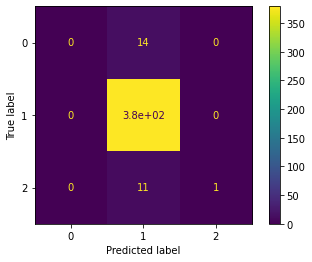

In [56]:
plot_confusion_matrix(clf_3, X_test, y_test)  
plt.show()


Bagged XGBoost

In [57]:
clf_4 = BaggingClassifier(base_estimator= xgb.XGBClassifier(), n_estimators=200,random_state=50).fit(X_train,y_train)
pred_bag_xg=clf_4.predict(X_test)
x_bag_xg=accuracy_score(y_test,pred_bag_xg)
print(f'the accuracy score is {x_bag_xg}')

the accuracy score is 0.9358024691358025


In [58]:
cm= confusion_matrix(y_test,pred_bag_xg)
print(cm)

[[  0  14   0]
 [  0 379   0]
 [  0  12   0]]


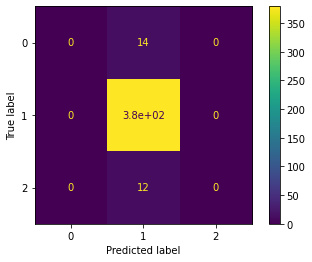

In [59]:
plot_confusion_matrix(clf_4, X_test, y_test)  
plt.show()


Bagged AdaBoost 

In [60]:
clf_5 = BaggingClassifier(base_estimator= AdaBoostClassifier(), n_estimators=200).fit(X_train,y_train)
pred_bag_ada=clf_5.predict(X_test)
x_bag_ada=accuracy_score(y_test,pred_bag_ada)
print(f'the accuracy score is {x_bag_ada}')

the accuracy score is 0.8839506172839506


In [61]:
cm= confusion_matrix(y_test,pred_bag_ada)
print(cm)

[[  1  13   0]
 [  1 356  22]
 [  0  11   1]]


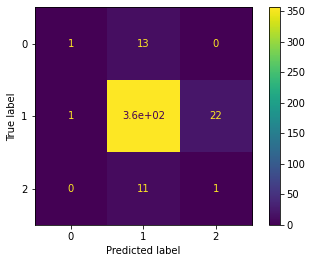

In [62]:
plot_confusion_matrix(clf_5, X_test, y_test)  
plt.show()
